## Baseline Model

Our baseline model is a 3-layer CNN applied with data augmentation.

Steps to build our model.

1.   Image Preprocessing
      * Convert to array
      * Normalize (1./255)

2.   Image Augmentation using Keras Image Data Generator
3.   Model Building
      * Conv2D
      * Conv2D
      * Conv2D
      * Flatten
      * Dense with softmax activation as output



In [1]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator
import numpy as np

In [42]:
train_path = '/content/drive/MyDrive/Omdena/Osun Nigeria/Data/Maize Images/data/train'
test_path = '/content/drive/MyDrive/Omdena/Osun Nigeria/Data/Maize Images/data/test'

In [92]:
# VARIABLES

TARGET_SIZE = (224, 224)
BATCH_SIZE = 30
EPOCHS = 25

LEARNING_RATE = 0.001

# Image Preprocessing

In [24]:
def preprocess(image):
  img = cv2.GaussianBlur(image,(5,5),0)
  return img_to_array(img)

## Image Augmentation

In [94]:
train_generator = ImageDataGenerator(rescale=1.0/255,
                             rotation_range=25,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             brightness_range=[0.2, 0.8],
                             validation_split=0.1,
                             preprocessing_function=preprocess)

valid_generator = ImageDataGenerator(rescale=1./255,
                                     validation_split = 0.1,
                                   preprocessing_function=preprocess)

test_generator = ImageDataGenerator(rescale=1./255,
                                   preprocessing_function=preprocess)

In [95]:
train_generated = train_generator.flow_from_directory(directory = train_path,
                                                    target_size = TARGET_SIZE,
                                                    batch_size = BATCH_SIZE,
                                                    subset = 'training')

validation_generated = valid_generator.flow_from_directory(directory = train_path,
                                                    target_size = TARGET_SIZE,
                                                    batch_size = BATCH_SIZE,
                                                    subset = 'validation')

test_generated = valid_generator.flow_from_directory(directory = test_path,
                                                    target_size = TARGET_SIZE,
                                                    batch_size = BATCH_SIZE)

Found 3016 images belonging to 4 classes.
Found 332 images belonging to 4 classes.
Found 840 images belonging to 4 classes.


## Model Specification

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout  
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

In [96]:
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(224, 224, 3), padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(10, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 10)      130       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 10)      410       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 31360)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 125444    
Total params: 125,984
Trainable params: 125,984
Non-trainable params: 0
________________________________________________

In [99]:
model.compile(optimizer=Adam(learning_rate = LEARNING_RATE), loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Omdena/Osun Nigeria/Model/baseline_weights_4.hdf5', monitor='val_loss', save_best_only=True)
#early_stop = EarlyStopping(monitor='val_loss', patience=4)

callbacks = [checkpoint]


In [100]:
history = model.fit(train_generated,
                    steps_per_epoch=len(train_generated)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=validation_generated,
                    verbose=2,
                    shuffle=True,
                    callbacks = callbacks)

Epoch 1/25
3/3 - 41s - loss: 1.4461 - accuracy: 0.2778 - val_loss: 1.5190 - val_accuracy: 0.4759
Epoch 2/25
3/3 - 8s - loss: 1.2752 - accuracy: 0.5444 - val_loss: 1.3785 - val_accuracy: 0.6265
Epoch 3/25
3/3 - 7s - loss: 1.1688 - accuracy: 0.6222 - val_loss: 1.0790 - val_accuracy: 0.6084
Epoch 4/25
3/3 - 8s - loss: 1.0567 - accuracy: 0.6444 - val_loss: 0.7467 - val_accuracy: 0.6898
Epoch 5/25
3/3 - 8s - loss: 1.0788 - accuracy: 0.4667 - val_loss: 0.7045 - val_accuracy: 0.6988
Epoch 6/25
3/3 - 7s - loss: 1.0038 - accuracy: 0.6444 - val_loss: 0.7729 - val_accuracy: 0.7199
Epoch 7/25
3/3 - 7s - loss: 1.0392 - accuracy: 0.6667 - val_loss: 0.8014 - val_accuracy: 0.7410
Epoch 8/25
3/3 - 7s - loss: 0.6750 - accuracy: 0.8556 - val_loss: 0.9591 - val_accuracy: 0.7620
Epoch 9/25
3/3 - 7s - loss: 0.9419 - accuracy: 0.7222 - val_loss: 0.5401 - val_accuracy: 0.7861
Epoch 10/25
3/3 - 7s - loss: 0.8799 - accuracy: 0.6889 - val_loss: 0.8326 - val_accuracy: 0.6657
Epoch 11/25
3/3 - 7s - loss: 0.9582 - 

In [15]:
import matplotlib.pyplot as plt

In [101]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']


In [17]:
def plot_acc(train_acc, val_acc):
  plt.figure()
  plt.plot(train_acc)
  plt.plot(val_acc)
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train Accuracy', 'Validation Accuracy'], loc = 'upper right')
  plt.show()

In [18]:
def plot_loss(train_loss, val_loss):
  plt.figure()
  plt.plot(train_loss)
  plt.plot(val_loss)
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train Loss', 'Validation Loss'], loc = 'upper right')
  plt.show()

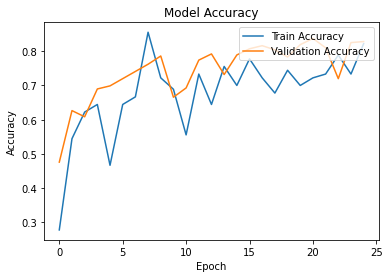

In [102]:
plot_acc(train_acc, val_acc)

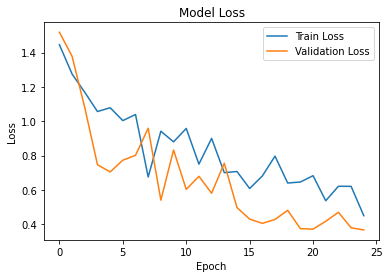

In [103]:
plot_loss(train_loss, val_loss)

In [105]:
#load weights
history.model.load_weights('/content/drive/MyDrive/Omdena/Osun Nigeria/Model/baseline_weights_4.hdf5')

In [106]:
# evaluate the model

acc = history.model.evaluate(test_generated)
acc

28/28 [==============================] - 11s 402ms/step - loss: 0.4052 - accuracy: 0.8202


[0.4052419066429138, 0.8202381134033203]

In [107]:
predictions = history.model.predict(test_generated)

In [111]:
# import classification_report
from sklearn.metrics import classification_report

test_labels = test_generated.classes
test_label_name = [cls for cls in test_generated.class_indices.keys()]
print(classification_report(test_labels, predictions.argmax(axis=1), target_names=test_label_name))

                precision    recall  f1-score   support

        Blight       0.30      0.42      0.35       230
   Common_Rust       0.30      0.30      0.30       262
Gray_Leaf_Spot       0.00      0.00      0.00       115
       Healthy       0.26      0.28      0.27       233

      accuracy                           0.29       840
     macro avg       0.22      0.25      0.23       840
  weighted avg       0.25      0.29      0.27       840



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
